# Stats

In [16]:
from lifelines.datasets import load_waltons, load_dd


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = load_dd()
data.head()


,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [6]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

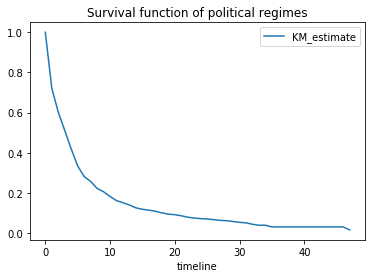

In [7]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

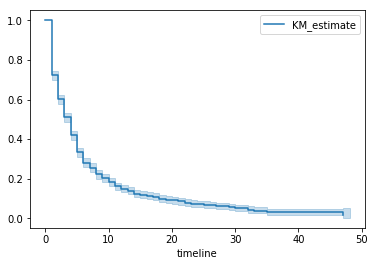

In [8]:
kmf.plot()

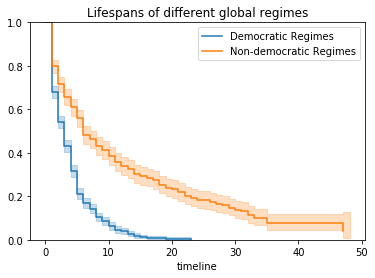

In [11]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)
# ci_force_lines=True


plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

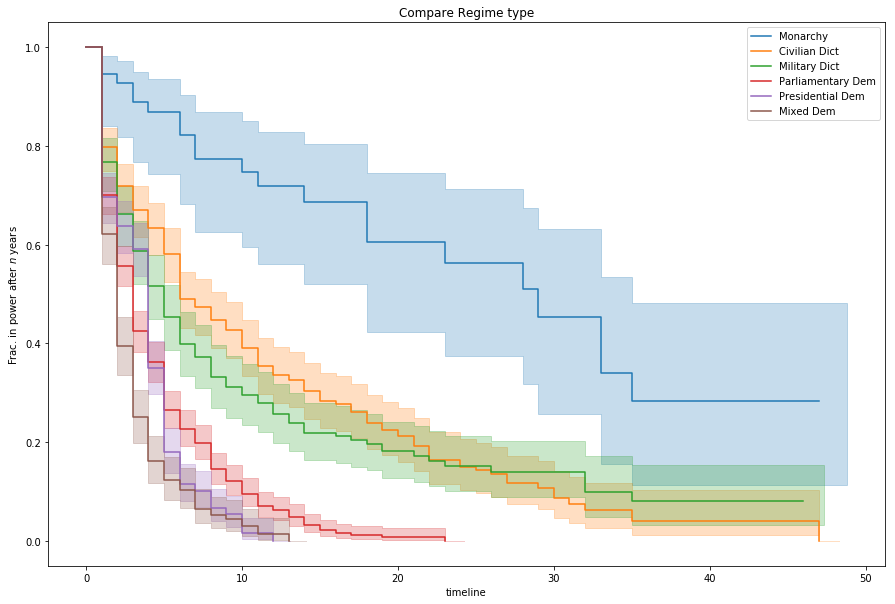

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax)
    plt.title('Compare Regime type')
#     plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

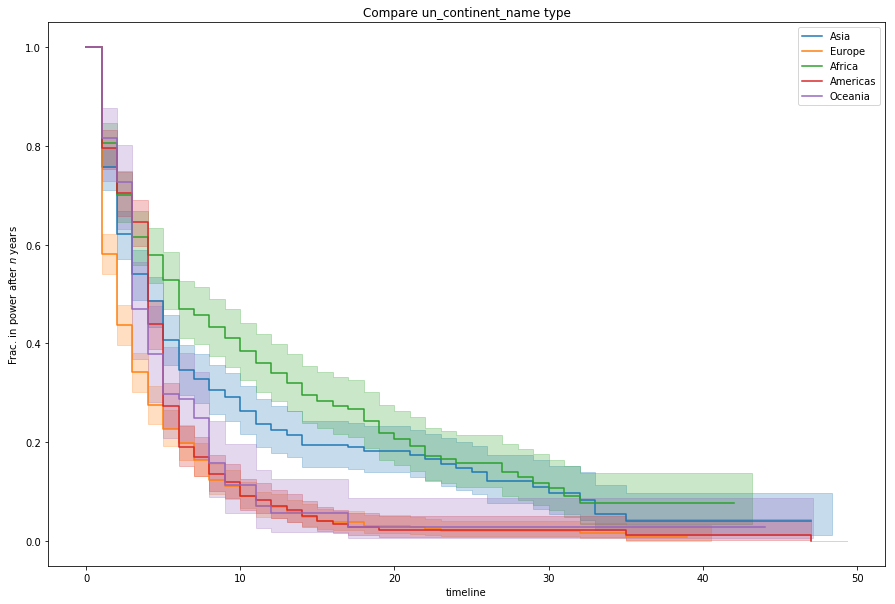

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

un_continent_names = data['un_continent_name'].unique()

for i, un_continent_name in enumerate(un_continent_names):
    ix = data['un_continent_name'] == un_continent_name
    kmf.fit(T[ix], E[ix], label=un_continent_name)
    kmf.plot(ax=ax)
    plt.title('Compare un_continent_name type')
#     plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

In [18]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

Results
   t 0: -1
   test: logrank
   alpha: 0.99
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00000 |            260.470 |      Reject Null    |        True       


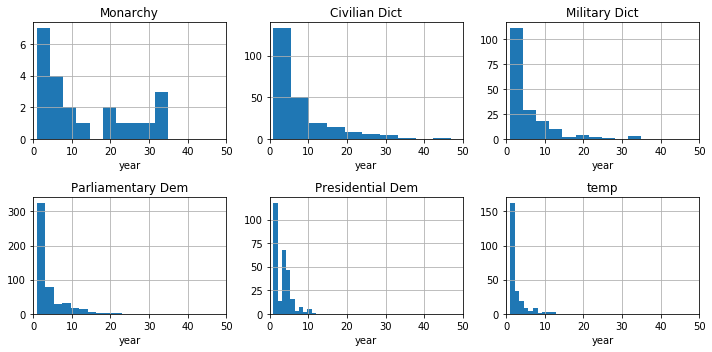

In [38]:
subset = data[data.observed==1]
    
for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    subset[subset.regime == regime_type].duration.hist(figsize=(10,5))
    plt.title(regime_type)
    plt.xlabel('year')
    plt.xlim(0, 50)
    
plt.tight_layout()
plt.title('temp')

# Regression

In [53]:
import patsy
# the '-1' term refers to not adding an intercept column (a column of all 1s).
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')
X

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1946.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1953.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1963.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0


In [54]:
from lifelines import AalenAdditiveFitter

aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)
X['T'] = data['duration']
X['E'] = data['observed']
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 1.4 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

In [55]:
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


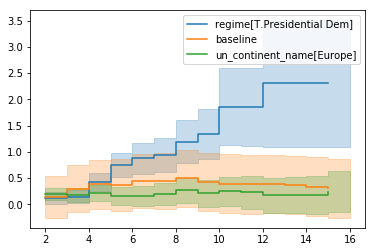

In [56]:
aaf.plot(columns=['regime[T.Presidential Dem]',
                  'baseline',
                  'un_continent_name[Europe]'], iloc=slice(1,15))

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year
268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2006.0


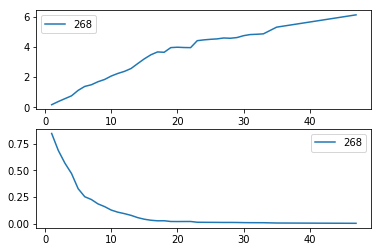

In [57]:
ix = (data['ctryname'] == 'Canada') & (data['start_year'] == 2006)
harper = X.loc[ix]
del harper['T']
del harper['E']

ax = plt.subplot(2,1,1)
aaf.predict_cumulative_hazard(harper).plot(ax=ax)

ax = plt.subplot(2,1,2)
aaf.predict_survival_function(harper).plot(ax=ax);

harper

In [113]:
living = X[X['E']==0]

life = aaf.predict_survival_function(living).T
life.columns = [int(c) for c in life.columns]

hazard = aaf.predict_cumulative_hazard(living).T
hazard.columns = [int(c) for c in hazard.columns]

# living.join(life)

prob_series = []
hazard_series = []
for idx, row in living.iterrows():
    year = row['T']

    while year not in life.columns:
        year -= 1

    prob_series.append(life.loc[idx, year])
    hazard_series.append(hazard.loc[idx, year])
        
series = pd.DataFrame({'alive_prob': prob_series,
                            'hazard': hazard_series,
                           }, index=life.index)
living.join(series)

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,T,E,alive_prob,hazard
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973.0,5,0,0.556681,0.585764
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978.0,1,0,0.809836,0.210924
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0,5,0,0.555957,0.587065
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0,8,0,0.428075,0.848456
10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1946.0,39,0,0.080849,2.515170
18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2005.0,4,0,0.385947,0.952055
20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1965.0,13,0,0.334780,1.094280
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0,10,0,0.528335,0.638025
28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2005.0,4,0,0.385947,0.952055
29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,4,0,0.724594,0.322144


In [87]:
living

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,T,E
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973.0,5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978.0,1,0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0,5,0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.0,8,0
10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1946.0,39,0
18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2005.0,4,0
20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1965.0,13,0
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0,10,0
28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2005.0,4,0
29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,4,0


#  Model selection

In [52]:
from lifelines.utils import k_fold_cross_validation

#create the three models we'd like to compare.
# aaf_1 = AalenAdditiveFitter(coef_penalizer=0.5)
# aaf_2 = AalenAdditiveFitter(coef_penalizer=10)

for i in range(20):
    print(i/2)
    aaf_test = AalenAdditiveFitter(coef_penalizer=i/2)
    score = np.mean(k_fold_cross_validation(aaf_test, X, duration_col='T', event_col='E', k=10))
    print(score)
    print()

0.0
 [-----------------76%---------         ] 1015 of 1321 complete in 1.0 secLinear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression error. Try increasing the penalizer term.
Linear regression erro

# Quick function

TODO: create a few classes for common use

In [ ]:
from lifelines import KaplanMeierFitter

def get_kmf(X, categorical=None):
    """
    Dataframe X with column T:timeline and E:event=0,1
    """
    
    types = data[categorical].unique()

    for i, regime_type in enumerate(regime_types):
        ix = data['regime'] == regime_type
        kmf.fit(T[ix], E[ix], label=regime_type)
        kmf.plot(ax=ax)
#         plt.title('Compare Regime type')
    #     plt.xlim(0, 50)
#         if i==0:
#             plt.ylabel('Frac. in power after $n$ years')
